In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')

In [8]:
sr = pd.read_csv('data/tropical-cyclones-1901-2000.csv')
sr = sr.set_index('year')['count']

<AxesSubplot: xlabel='year'>

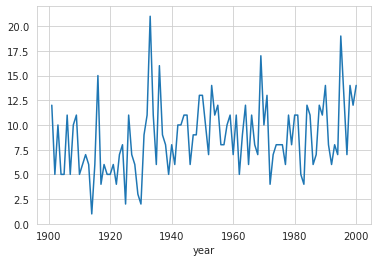

In [10]:
sr.plot()

In [338]:
def log_likelihood(theta):
    js = np.arange(sr.shape[0]) + 1  # time steps
    T = (sr.sum(), (js * sr).sum())  # sufficient stats

    a, b = theta[0], theta[1]
    logl = T[0]*np.log(a/b) + T[1]*np.log(b) - a * (b**(js-1)).sum()
    return logl

In [331]:
from itertools import product

a_range = np.linspace(0.4, 70, 60)
b_range = np.linspace(0.95, 1.05, 60)

df = []
for (a, b) in product(a_range, b_range):
    df.append((a, b, log_likelihood((a,b))))

df = pd.DataFrame(df, columns=['a','b','logl'])
max_logl = log_likelihood(np.array([7.06, 1.0042]))

In [332]:
df[(df.logl / max_logl) > 0.15].describe()

,a,b,logl
count,1282.000000,1282.000000,1282.000000
mean,28.428451,0.981542,535.319952
std,17.613598,0.018481,247.040282
min,0.400000,0.953390,155.067532
25%,13.376271,0.966949,319.381798
50%,26.352542,0.978814,507.584967
75%,41.688136,0.992373,734.787653
max,67.640678,1.050000,1032.497944


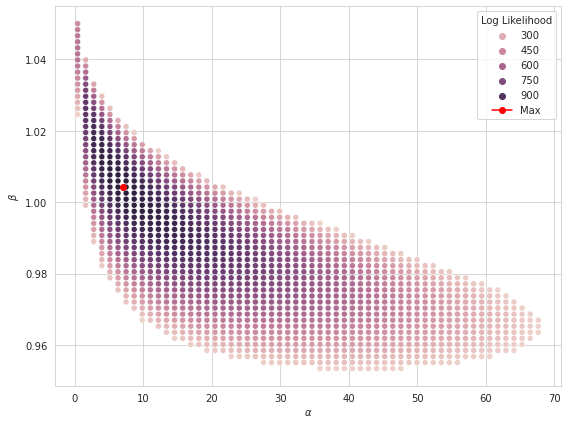

In [349]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(data=df[(df.logl / max_logl) > 0.15], x='a', y='b', hue='logl', palette=sns.cubehelix_palette(as_cmap=True), ax=ax)
ax.plot(7.06, 1.0042, color='red', marker='o', label='Max')

ax.legend(title='Log Likelihood')
ax.set_xlabel('$\\alpha$')
ax.set_ylabel('$\\beta$')
fig.tight_layout()
fig.show()